In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import linspace
from math import exp, fabs
import sys

In [2]:

'''
Функция, которая возвращает значение заданной функции
в точке x.
'''
def f(x):
    return exp(x) * x
 
'''
Функция, которая возвращает i-ю произвоную функции
в точке x.
'''
def diff_f(i, x):
    return exp(x) * x + i * exp(x)
 
'''
Функция, которая возвращает значение первой производной функции f
на основе центральной формулы численного дифференцирования
2-го порядка в точке x_0 для шага дифференцирования ℎ.
'''
def diff2(x_0, h, f):
    return (f(x_0 + h) - f(x_0 - h)) / (2 * h)
 
'''
Функция, которая возвращает значение первой производной функции f
на основе центральной формулы численного дифференцирования
4-го порядка в точке x_0 для шага дифференцирования ℎ.
'''
def diff4(x_0, h, f):
    return (f(x_0 - 2 * h) - 8 * f(x_0 - h) + 8 * f(x_0 + h) - f(x_0 + 2 * h)) / (12 * h)
 
'''
Функция, которая возвращает абсолютную погрешность численного
дифференцирования функции f в точке x_0, при помощи формулы
численного дифференцирования n-го порядка diff_n, в зависимости
от шага h.
'''
def absolute_error_E(f, diff_f, x_0, h, diff_n):
    return fabs(diff_f(1, x_0) - diff_n(x_0, h, f))
 
'''
Функция, которая возвращает погрешность метода численного
дифференцирования для центральной формулы 2-го порядка
в точке x_0 для шага дифференцирования ℎ.
'''
def error_method_term_O_2(x_0, h):
    interval_a_b = np.arange(x_0 - h, x_0 + h, 0.1)
    M = [fabs(diff_f(3, h_i)) for h_i in interval_a_b]
    return 4 * (h**2) * max(M) / 6
 
'''
Функция, которая возвращает погрешность метода численного
дифференцирования для центральной формулы 4-го порядка
в точке x_0 для шага дифференцирования ℎ.
'''
def error_method_term_O_4(x_0, h):
    interval_a_b = np.arange(x_0 - 2 * h, x_0 + 2 * h, 0.1)
    M = [fabs(diff_f(5, h_i)) for h_i in interval_a_b]
    return 8 * (h**4) * max(M) / 30
 
'''
Функция, которая возвращает вычислительную погрешность
численного дифференцирования для центральной формулы
2-го порядка в точке x_0 для шага дифференцирования ℎ.
'''
def error_machine_term_2(x_0, h):
    eps = sys.float_info.epsilon
    return 32 * eps / h
 
'''
Функция, которая возвращает вычислительную погрешность
численного дифференцирования для центральной формулы
4-го порядка в точке x_0 для шага дифференцирования ℎ.
'''
def error_machine_term_4(x_0, h):
    eps = sys.float_info.epsilon
    return 32 * (3 * eps) / (2 * h)

In [3]:
'''
Данные
'''
low_border = -16   # Нижняя граница множества значений шага (степень 10)
high_border = 0   # Верхняя граница множества значений шага (степень 10)
x_0 = 2;    # Точка, в которой будет взята производная
 
'''
Вычисления
'''
h_M_2 = np.logspace(low_border, -6, 70, endpoint=True)
h_O_2 = np.logspace(-5, high_border, 70, endpoint=True)
h_M_4 = np.logspace(low_border, -4, 70, endpoint=True)
h_O_4 = np.logspace(-3, high_border, 70, endpoint=True)
h = np.logspace(low_border, high_border, 70, endpoint=True)
# Получение ординат для loglog графиков
O_2 = [error_method_term_O_2(x_0, h_i) for h_i in h_O_2]
O_4 = [error_method_term_O_4(x_0, h_i) for h_i in h_O_4]
M_2 = [error_machine_term_2(x_0, h_i) for h_i in h_M_2]
M_4 = [error_machine_term_4(x_0, h_i) for h_i in h_M_4]
E_2 = [absolute_error_E(f, diff_f, x_0, h_i, diff2) for h_i in h]
E_4 = [absolute_error_E(f, diff_f, x_0, h_i, diff4) for h_i in h]

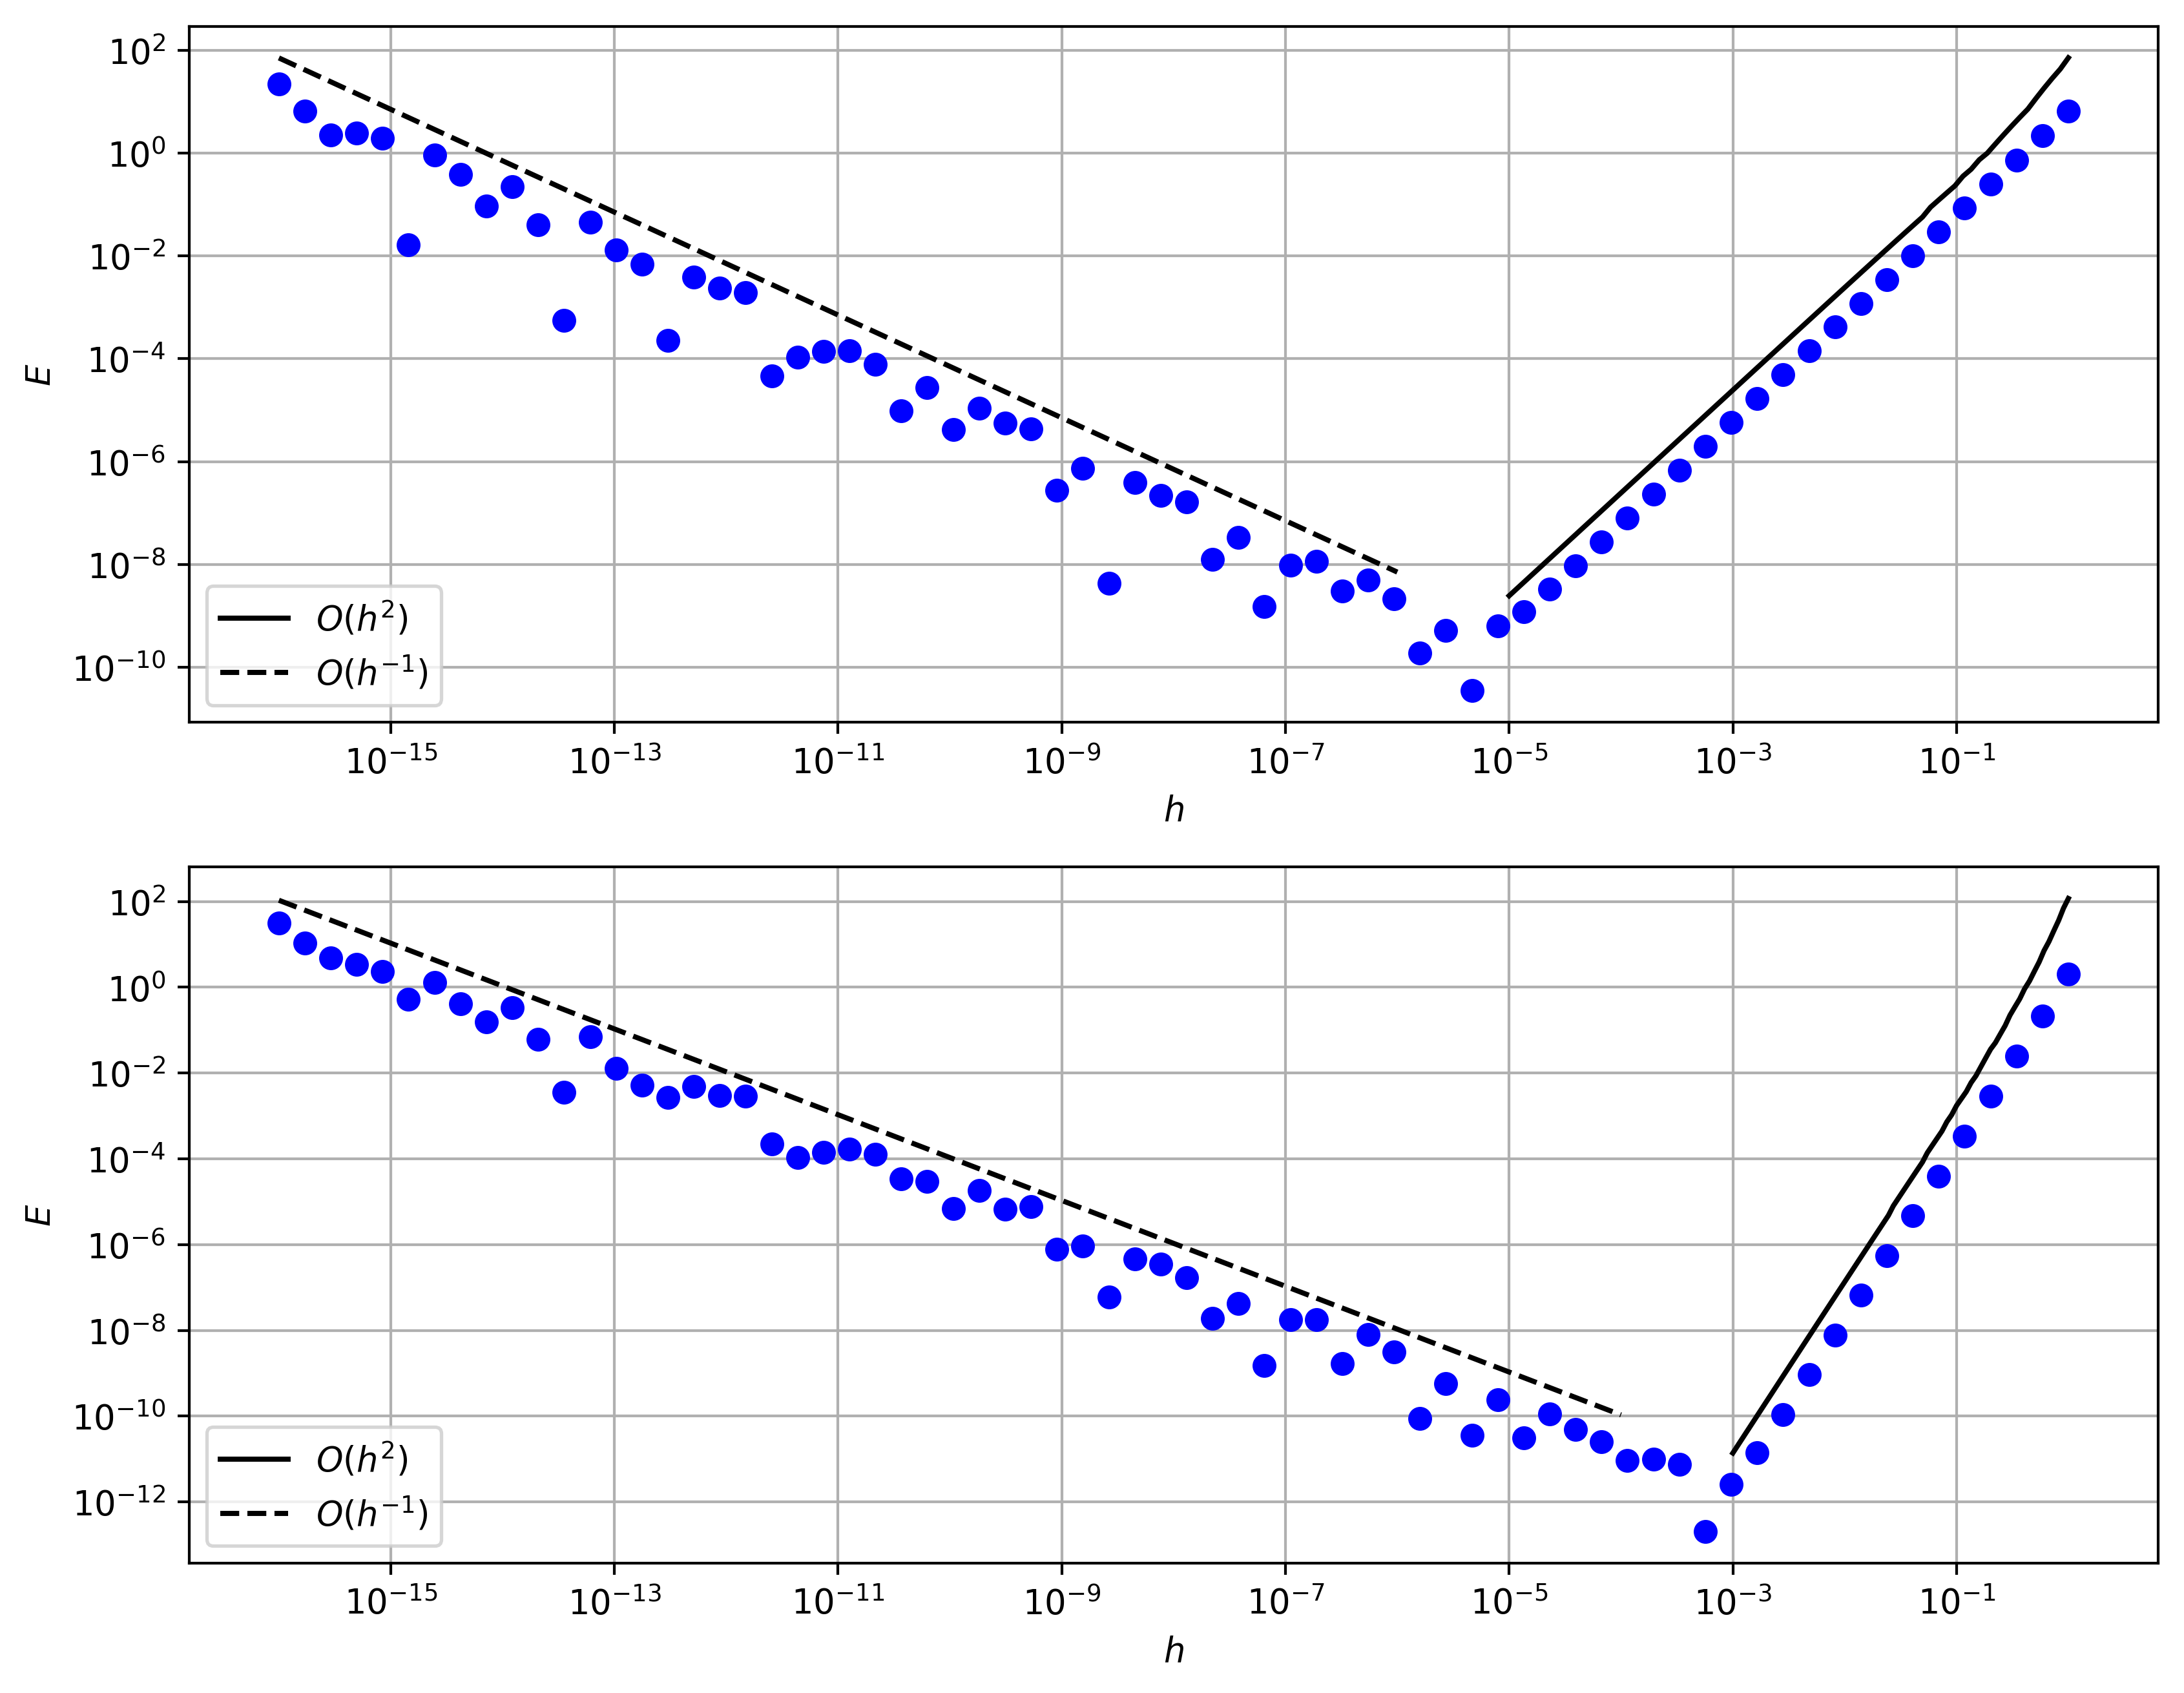

In [4]:
'''
Вывод
'''
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (9, 7), dpi = 380)
axes[0].loglog(h_O_2, O_2, color="black", label="$O({h^2})$")  
axes[0].loglog(h_M_2, M_2, linestyle = "--", color="black", label="${O(h^{-1})}$")  
axes[0].loglog(h, E_2, 'o', color="blue")
axes[0].set_xlabel('$h$')
axes[0].set_ylabel('$E$')
axes[0].legend(loc='lower left');
axes[0].grid()
axes[1].loglog(h_O_4, O_4, color="black", label="$O({h^2})$")
axes[1].loglog(h_M_4, M_4, linestyle = "--", color="black", label="$O({h^{-1}})$")  
axes[1].loglog(h, E_4, 'o', color="blue")
axes[1].set_xlabel('$h$')
axes[1].set_ylabel('$E$')
axes[1].legend(loc='lower left');
axes[1].grid()
fig.tight_layout()
plt.show()
#fig.savefig("numerical_differentiation.png")